<a href="https://colab.research.google.com/github/Tong-Zhong/linear_regression-KNN/blob/main/2022Q3%E6%A1%83%E5%9C%92%E5%AF%A6%E5%83%B9%E7%99%BB%E9%8C%84_%E5%88%86%E9%A1%9E%E6%BC%94%E7%AE%97%E6%B3%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<br>
<br>

<font color="torange" size=6px><center><b>資料科學與公共事務</b></span></center></font>

<br>
<br>

<font color="orange" size=5px><center><b>專題報告二--機器學習</b></span></center></font>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**1.欲回答的疑問**

**問題1**:可以用 **移轉層次、屋齡、建物現況格局-房、建物現況格局-衛、有無隔間、附屬建物面積(平方公尺)、陽台面積(平方公尺)** 這些欄位預測**單價(平方公尺/元)**嗎?

**演算法:** 迴歸分析

**變數:**

Y = 單價(平方公尺/元)

X = 移轉層次、屋齡、建物現況格局-房、建物現況格局-衛、有無隔間、附屬建物面積(平方公尺)、陽台面積(平方公尺)

**問題2:**可以用 **建物現況格局-房、建物現況格局-衛、附屬建物面積(平方公尺)、陽台面積(平方公尺)、有無隔間、有無電梯、有無管理組織** 這些欄位分類**建物型態**嗎?

**演算法:** KNN (K 近鄰) 預測模型

**變數:**

Y = 建物型態 

X = 建物現況格局-房、建物現況格局-衛、附屬建物面積(平方公尺)、陽台面積(平方公尺)、有無隔間、有無電梯、有無管理組織

#**2.資料來源與內容**

**資料來源:**(實價登錄) https://plvr.land.moi.gov.tw/DownloadOpenData

**內容來源:**(均方誤差)　https://staruphackers.com/%E4%BB%80%E9%BA%BC%E6%98%AF%E5%9D%87%E6%96%B9%E8%AA%A4%E5%B7%AE-mean-square-error-mse%EF%BC%9F/ 

(判定係數) http://homepage.ntu.edu.tw/~clhsieh/biostatistic/9/9-7.html

https://begin4learn.gitbooks.io/begin-to-learn-statistics/content/Statistics/Coefficient_of_determination.html

#前置作業

In [ ]:
#匯入套件
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import re
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

In [ ]:
#設定--不顯示python輸出的警告
import warnings #有關python輸出的警告
warnings.filterwarnings("ignore") #不顯示python輸出的警告
#warnings.filterwarnings("always") #顯示python輸出的警告

In [ ]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns
from matplotlib.font_manager import fontManager
from matplotlib.font_manager import FontProperties

# 改style要在改font之前

plt.style.use('seaborn')  #可適用在seaborn
fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
font=FontProperties(fname='TaipeiSansTCBeta-Regular.ttf',size=14)
sns.set(font=font.get_name()) #作圖用到sns.set時需打這段函式
mpl.rc('font', family='Taipei Sans TC Beta')

--2023-01-15 07:52:41--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.251.163.100, 142.251.163.102, 142.251.163.113, ...
Connecting to drive.google.com (drive.google.com)|142.251.163.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/q4b1kihs3q993tc6q0de73qdafmoae2o/1673769150000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=7c209897-bd17-427e-bbdc-0cb168611aa2 [following]
--2023-01-15 07:52:44--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/q4b1kihs3q993tc6q0de73qdafmoae2o/1673769150000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=7c209897-bd17-427e-bbdc-0cb168611aa2
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 142.251.163.132, 2607:f8b0:4004:c1b::84
Connecting to d

###**主題名稱：**探討2022年第3季桃園市龍潭區的房屋單價以及建物型態
###**姓名：**鍾雨彤
###**學號：**S08521136
###**日期：**2023/01/13


#**3.資料前處理與探索性分析**

In [ ]:
#匯入桃園市2022年Q3的資料
_2022_Q3_Taoyuan_City = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/專題二---縣市資料/2022_Q3_桃園市.csv')

_2022_Q3_Taoyuan_City

,鄉鎮市區,交易標的,土地位置建物門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,移轉層次,...,車位類別,車位移轉總面積(平方公尺),車位總價元,備註,編號,主建物面積,附屬建物面積,陽台面積,電梯,移轉編號
0,The villages and towns urban district,transaction sign,land sector position building sector house num...,land shifting total area square meter,the use zoning or compiles and checks,the non-metropolis land use district,non-metropolis land use,transaction year month and day,transaction pen number,shifting level,...,the berth category,berth shifting total area square meter,the berth total price NTD,the note,serial number,NaN,NaN,NaN,NaN,NaN
1,桃園區,車位,桃園市桃園區東國街８９號四樓,3.11,都市：其他:停車場用地,NaN,NaN,1110902,土地1建物1車位1,四層,...,升降平面,0.0,550000,僅車位交易；,RPOQMLQJRHHGFAH58EA,0.00,0.00,0.00,有,1.0
2,大溪區,土地,信義段2513地號,1091.04,NaN,山坡地保育區,農牧用地,1110801,土地1建物0車位0,NaN,...,NaN,0.0,0,NaN,RPWNMLNJQHHGFCH78DA,0.00,0.00,0.00,無,NaN
3,觀音區,土地,富溪段110地號,264.23,NaN,NaN,NaN,1110802,土地6建物0車位0,NaN,...,NaN,0.0,0,含仲介費1200000元；親友、員工、共有人或其他特殊關係間之交易；,RPXNMLOJQHHGFBH88DA,0.00,0.00,0.00,無,2.0
4,八德區,房地(土地+建物),桃園市八德區中華路２６５巷３之４號,17.77,住,NaN,NaN,1110802,土地4建物1車位0,五層,...,NaN,0.0,0,頂樓加蓋；,RPTOMLPJQHHGFFH09DA,52.18,2.75,2.17,無,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12128,楊梅區,土地,長岡嶺段71地號,93.75,NaN,山坡地保育區,農牧用地,1060423,土地1建物0車位0,NaN,...,NaN,0.0,0,NaN,RPQOMLPLQHHGFDH78DA,0.00,0.00,0.00,無,NaN
12129,龍潭區,房地(土地+建物),桃園市龍潭區文化路５８７巷５３之２號,1864.03,農,NaN,NaN,1041009,土地1建物1車位0,全,...,NaN,0.0,0,NaN,RPPPMLPKOHHGFCH48EA,306.80,0.00,13.95,無,NaN
12130,桃園區,房地(土地+建物)+車位,桃園市桃園區福元街１２９號二樓,20.11,住,NaN,NaN,1000602,土地1建物1車位1,二層,...,坡道平面,37.81,0,NaN,RPPNMLRJOHHGFAH08DA,62.93,1.24,7.61,有,NaN
12131,中壢區,房地(土地+建物)+車位,桃園市中壢區環西路二段３００巷６之７號三樓,8.65,住,NaN,NaN,1000605,土地2建物1車位1,三層,...,坡道平面,15.52,0,陽台外推；,RPROMLRLOHHGFBH68DA,54.80,1.43,12.78,有,4210.0


In [ ]:
#刪除第0列的欄位英文
_2022_Q3_Taoyuan_City = _2022_Q3_Taoyuan_City.drop([0])

In [ ]:
#將確定不會使用到的欄位刪除
_2022_Q3_Taoyuan_City = _2022_Q3_Taoyuan_City.drop(columns=['土地位置建物門牌', '都市土地使用分區', '非都市土地使用分區', '非都市土地使用編定', '交易筆棟數', '主要用途', '主要建材',
               '車位類別', '車位移轉總面積(平方公尺)', '車位總價元', '備註', '編號', '移轉編號'])

In [ ]:
#挑出龍潭區的資料
_2022_Q3_Longtan_Dist = _2022_Q3_Taoyuan_City.loc[_2022_Q3_Taoyuan_City['鄉鎮市區'].isin(['龍潭區'])]
_2022_Q3_Longtan_Dist

,鄉鎮市區,交易標的,土地移轉總面積平方公尺,交易年月日,移轉層次,總樓層數,建物型態,建築完成年月,建物移轉總面積平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,建物現況格局-隔間,有無管理組織,總價元,單價元平方公尺,主建物面積,附屬建物面積,陽台面積,電梯
5,龍潭區,房地(土地+建物),79.44,1110802,全,二層,透天厝,0701216,96.0,3,2,2,有,無,2000000,20833,90.00,0.00,6.00,無
8,龍潭區,房地(土地+建物)+車位,16.52,1110802,十層，見其他登記事項,十層,華廈(10層含以下有電梯),0950410,87.12,1,1,1,有,有,4200000,60434,42.81,0.00,0.00,有
31,龍潭區,房地(土地+建物),12.47,1110808,三層,十四層,住宅大樓(11層含以上有電梯),0870407,41.87,1,1,1,有,有,2880000,68784,24.96,0.00,4.12,有
37,龍潭區,土地,64.0,1110811,NaN,NaN,其他,NaN,0.0,0,0,0,有,無,717249,11207,0.00,0.00,0.00,無
38,龍潭區,房地(土地+建物),12.47,1110805,二層,十四層,住宅大樓(11層含以上有電梯),0870407,43.47,0,0,0,無,有,1760000,40488,25.61,0.00,4.12,有
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11908,龍潭區,房地(土地+建物),8.69,1081021,六層,十五層,住宅大樓(11層含以上有電梯),1110614,44.97,0,0,1,有,有,2070000,46031,23.63,1.23,3.50,有
11909,龍潭區,房地(土地+建物),8.69,1081020,三層,十五層,住宅大樓(11層含以上有電梯),1110614,44.97,0,0,1,有,有,2020000,44919,23.63,1.23,3.50,有
11910,龍潭區,房地(土地+建物)+車位,31.91,1081030,七層,十五層,住宅大樓(11層含以上有電梯),1110614,209.85,0,0,2,有,有,10960000,60196,76.55,0.00,17.83,有
11911,龍潭區,房地(土地+建物)+車位,35.77,1081015,十三層,十五層,住宅大樓(11層含以上有電梯),1110614,229.3,0,0,2,有,有,13690000,69281,89.77,0.00,16.67,有


In [ ]:
#挑出'交易標的'中'房地(土地+建物)'的資料
_2022_Q3_Longtan_Dist = _2022_Q3_Longtan_Dist.loc[_2022_Q3_Longtan_Dist['交易標的'].isin(['房地(土地+建物)'])]

In [ ]:
#查看'移轉層次'的值
_2022_Q3_Longtan_Dist['移轉層次'].value_counts()

全                  179
五層                  23
三層                  20
四層                  16
二層                  15
六層                  13
八層                  11
九層                  10
一層                  10
七層                   9
十一層                  7
十層                   6
十三層                  5
十四層                  5
十五層                  4
十二層                  4
五層，見其他登記事項           3
七層，見其他登記事項           1
二層，見其他登記事項           1
一層，二層，三層，四層，地下層      1
Name: 移轉層次, dtype: int64

In [ ]:
#將'移轉層次'替換成數字，多樓層的轉移，則取其交易最高樓
_2022_Q3_Longtan_Dist = _2022_Q3_Longtan_Dist.replace({'移轉層次': {'五層':5, '三層':3, '四層':4,  '二層':2, '六層':6, '八層':8, '九層':9, '一層':1, '七層':7, 
                            '十一層':11, '十層':10, '十三層':13, '十四層':14, '十五層':15, '十二層':12,'五層，見其他登記事項':5, '七層，見其他登記事項':7, 
                            '二層，見其他登記事項':2, '一層，二層，三層，四層，地下層':4}}) 

In [ ]:
#查看'總樓層數'的值
_2022_Q3_Longtan_Dist['總樓層數'].value_counts()

十五層     103
二層       70
四層       68
三層       27
五層       22
十層       13
十四層      12
一層       11
六層       10
十二層       3
八層        1
七層        1
九層        1
二十二層      1
Name: 總樓層數, dtype: int64

In [ ]:
#將'總樓層數'替換成數字
_2022_Q3_Longtan_Dist = _2022_Q3_Longtan_Dist.replace({'總樓層數': {'十五層':15, '二層':2, '四層':4,  '三層':3, '五層':5, '十層':10, '十四層':14, '一層':1, '六層':6, 
                            '十二層':12, '八層':8, '七層':7, '九層':9, '二十二層':22}}) 

In [ ]:
#將'移轉層次'等於'全'的值填上'總樓層數'的值
for j in range(len(_2022_Q3_Longtan_Dist)):
  if _2022_Q3_Longtan_Dist['移轉層次'].values[j] == '全':
    _2022_Q3_Longtan_Dist.replace(_2022_Q3_Longtan_Dist['移轉層次'].values[j], _2022_Q3_Longtan_Dist['總樓層數'].values[j],inplace = True)

In [ ]:
#把'交易年月日'、'建築完成年月'的日期去掉，只剩下年份
_deal_years = np.arange(343)  #建立一個ndarray
_final_years = np.arange(343)
_2022_Q3_Longtan_Dist.rename(columns = {'交易年月日':'房地產交易年', '建築完成年月':'建築完成年'}, inplace = True)
for i in range(len(_2022_Q3_Longtan_Dist)):
   _deal_years[i] = _2022_Q3_Longtan_Dist['房地產交易年'].values[i][0:3]
   _final_years[i] = _2022_Q3_Longtan_Dist['建築完成年'].values[i][0:3]
_2022_Q3_Longtan_Dist['房地產交易年'] = _deal_years
_2022_Q3_Longtan_Dist['建築完成年'] = _final_years

In [ ]:
#查看'建物型態'的值
_2022_Q3_Longtan_Dist['建物型態'].value_counts()

透天厝                179
住宅大樓(11層含以上有電梯)    119
華廈(10層含以下有電梯)       31
公寓(5樓含以下無電梯)        14
Name: 建物型態, dtype: int64

In [ ]:
#將'建物型態'的值編制數字代號
#透天厝 = 0、 住宅大樓(11層含以上有電梯) = 1、 華廈(10層含以下有電梯) = 2、 公寓(5樓含以下無電梯) = 3
_2022_Q3_Longtan_Dist['建物型態'].replace(['透天厝','住宅大樓(11層含以上有電梯)','華廈(10層含以下有電梯)','公寓(5樓含以下無電梯)'],[0,1,2,3], inplace = True)
_2022_Q3_Longtan_Dist

,鄉鎮市區,交易標的,土地移轉總面積平方公尺,房地產交易年,移轉層次,總樓層數,建物型態,建築完成年,建物移轉總面積平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,建物現況格局-隔間,有無管理組織,總價元,單價元平方公尺,主建物面積,附屬建物面積,陽台面積,電梯
5,龍潭區,房地(土地+建物),79.44,111,2,2,0,70,96.0,3,2,2,有,無,2000000,20833,90.00,0.00,6.00,無
31,龍潭區,房地(土地+建物),12.47,111,3,14,1,87,41.87,1,1,1,有,有,2880000,68784,24.96,0.00,4.12,有
38,龍潭區,房地(土地+建物),12.47,111,2,14,1,87,43.47,0,0,0,無,有,1760000,40488,25.61,0.00,4.12,有
39,龍潭區,房地(土地+建物),22.68,111,2,6,2,103,81.39,2,2,1,有,有,4800000,58975,51.43,0.00,6.22,有
102,龍潭區,房地(土地+建物),12.89,111,4,5,3,84,33.75,0,0,0,無,無,980000,29037,25.42,0.00,2.07,無
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11905,龍潭區,房地(土地+建物),8.91,108,4,15,1,111,46.63,0,0,1,有,有,2100000,45035,24.29,1.83,3.50,有
11907,龍潭區,房地(土地+建物),8.69,108,4,15,1,111,44.97,0,0,1,有,有,2080000,46253,23.63,1.23,3.50,有
11908,龍潭區,房地(土地+建物),8.69,108,6,15,1,111,44.97,0,0,1,有,有,2070000,46031,23.63,1.23,3.50,有
11909,龍潭區,房地(土地+建物),8.69,108,3,15,1,111,44.97,0,0,1,有,有,2020000,44919,23.63,1.23,3.50,有


In [ ]:
#將'建物現況格局-隔間'、'有無管理組織'、'電梯'的值編制數字代號
#無 = 0, 有 = 1
_2022_Q3_Longtan_Dist = _2022_Q3_Longtan_Dist.replace({'建物現況格局-隔間':{'無':0,'有':1}, '有無管理組織':{'無':0,'有':1}, '電梯':{'無':0,'有':1}})

In [ ]:
#將('房地產交易年'- '建築完成年'+ 1)得出屋齡，如果有先前交易而後於111年完成建物的情況，則屋齡填入1。
#添加至'屋齡'欄位
buliding_year = np.arange(343) 
for b in range(len(_2022_Q3_Longtan_Dist)):
   _diff = _2022_Q3_Longtan_Dist['房地產交易年'].values[b] - _2022_Q3_Longtan_Dist['建築完成年'].values[b]
   if _diff < 0:
     buliding_year[b] = 1
   elif _diff >= 0: 
     buliding_year[b] = _diff + 1


_2022_Q3_Longtan_Dist['屋齡'] = buliding_year

In [ ]:
#將'建物現況格局-房'、'建物現況格局-衛'、'總價元'、'建物現況格局-廳'轉成int，'單價元平方公尺'、'土地移轉總面積平方公尺'、'建物移轉總面積平方公尺'轉成float
_2022_Q3_Longtan_Dist['總價元'] = _2022_Q3_Longtan_Dist['總價元'].astype(str).astype(int)   #object需先轉成string
_2022_Q3_Longtan_Dist['建物現況格局-廳'] = _2022_Q3_Longtan_Dist['建物現況格局-廳'].astype(str).astype(int)
_2022_Q3_Longtan_Dist['建物現況格局-房'] = _2022_Q3_Longtan_Dist['建物現況格局-房'].astype(str).astype(int) 
_2022_Q3_Longtan_Dist['建物現況格局-衛'] = _2022_Q3_Longtan_Dist['建物現況格局-衛'].astype(str).astype(int)
_2022_Q3_Longtan_Dist['單價元平方公尺'] = _2022_Q3_Longtan_Dist['單價元平方公尺'].astype(str).astype(float)
_2022_Q3_Longtan_Dist['土地移轉總面積平方公尺'] = _2022_Q3_Longtan_Dist['土地移轉總面積平方公尺'].astype(str).astype(float)
_2022_Q3_Longtan_Dist['建物移轉總面積平方公尺'] = _2022_Q3_Longtan_Dist['建物移轉總面積平方公尺'].astype(str).astype(float)

In [ ]:
#將'土地移轉總面積平方公尺': '土地移轉總面積(平方公尺)'、'建物移轉總面積平方公尺': '建物移轉總面積(平方公尺)'、'建物現況格局-隔間'改為'有無隔間'、'主建物面積'改為'主建物面積(平方公尺)'
#、'附屬建物面積'改為'附屬建物面積(平方公尺)'、'陽台面積'改為'陽台面積(平方公尺)'、'單價元平方公尺'改為'單價(平方公尺/元)'、'電梯'改為'有無電梯'
_2022_Q3_Longtan_Dist = _2022_Q3_Longtan_Dist.rename(columns={'土地移轉總面積平方公尺': '土地移轉總面積(平方公尺)', '建物移轉總面積平方公尺': '建物移轉總面積(平方公尺)','主建物面積': '主建物面積(平方公尺)',
'總價元':'總價(元)', '建物現況格局-隔間': '有無隔間', '單價元平方公尺': '單價(平方公尺/元)', '附屬建物面積':'附屬建物面積(平方公尺)', '陽台面積':'陽台面積(平方公尺)', '電梯':'有無電梯'})

In [ ]:
#計算遺漏值
_2022_Q3_Longtan_Dist.isnull().sum().sum()

0

In [ ]:
#查看資料表資訊
_2022_Q3_Longtan_Dist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 343 entries, 5 to 12129
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   鄉鎮市區           343 non-null    object 
 1   交易標的           343 non-null    object 
 2   土地移轉總面積(平方公尺)  343 non-null    float64
 3   房地產交易年         343 non-null    int64  
 4   移轉層次           343 non-null    int64  
 5   總樓層數           343 non-null    int64  
 6   建物型態           343 non-null    int64  
 7   建築完成年          343 non-null    int64  
 8   建物移轉總面積(平方公尺)  343 non-null    float64
 9   建物現況格局-房       343 non-null    int64  
 10  建物現況格局-廳       343 non-null    int64  
 11  建物現況格局-衛       343 non-null    int64  
 12  有無隔間           343 non-null    int64  
 13  有無管理組織         343 non-null    int64  
 14  總價(元)          343 non-null    int64  
 15  單價(平方公尺/元)     343 non-null    float64
 16  主建物面積(平方公尺)    343 non-null    float64
 17  附屬建物面積(平方公尺)   343 non-null    float64
 18  陽台面積(平方公

#**4.機器學習1--預測數值型欄位**

**問題1**:可以用 **移轉層次、屋齡、建物現況格局-房、建物現況格局-衛、有無隔間、附屬建物面積(平方公尺)、陽台面積(平方公尺)** 這些欄位預測**單價(平方公尺/元)**嗎?

##**4-1.模型選擇--特徵組合與演算法**

迴歸分析(regression analysis)

In [ ]:
#將需要的columns挑出來
_2022_Q3_Longtan_Dist_linear_regression = pd.DataFrame(_2022_Q3_Longtan_Dist.loc[:,['單價(平方公尺/元)','移轉層次','屋齡','建物現況格局-房','建物現況格局-衛', '有無隔間',
       '有無管理組織','附屬建物面積(平方公尺)','陽台面積(平方公尺)']])
_2022_Q3_Longtan_Dist_linear_regression

,單價(平方公尺/元),移轉層次,屋齡,建物現況格局-房,建物現況格局-衛,有無隔間,有無管理組織,附屬建物面積(平方公尺),陽台面積(平方公尺)
5,20833.0,2,42,3,2,1,0,0.00,6.00
31,68784.0,3,25,1,1,1,1,0.00,4.12
38,40488.0,2,25,0,0,0,1,0.00,4.12
39,58975.0,2,9,2,1,1,1,0.00,6.22
102,29037.0,4,28,0,0,0,0,0.00,2.07
...,...,...,...,...,...,...,...,...,...
11905,45035.0,4,1,0,1,1,1,1.83,3.50
11907,46253.0,4,1,0,1,1,1,1.23,3.50
11908,46031.0,6,1,0,1,1,1,1.23,3.50
11909,44919.0,3,1,0,1,1,1,1.23,3.50


探索性資料分析

In [ ]:
_2022_Q3_Longtan_Dist_linear_regression.describe()  #計算每一欄位的基本敘述統計

,單價(平方公尺/元),移轉層次,屋齡,建物現況格局-房,建物現況格局-衛,有無隔間,有無管理組織,附屬建物面積(平方公尺),陽台面積(平方公尺)
count,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000
mean,59625.740525,3.976676,18.370262,2.314869,2.075802,0.950437,0.597668,2.973090,6.820991
std,47512.470366,3.283760,17.562585,2.106794,1.446946,0.217357,0.491085,6.438595,8.578694
min,13343.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,44887.000000,2.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,51535.000000,2.000000,17.000000,3.000000,2.000000,1.000000,1.000000,0.000000,3.500000
75%,64032.000000,5.000000,29.500000,4.000000,3.000000,1.000000,1.000000,2.620000,7.875000
max,788526.000000,15.000000,108.000000,12.000000,11.000000,1.000000,1.000000,67.980000,66.860000


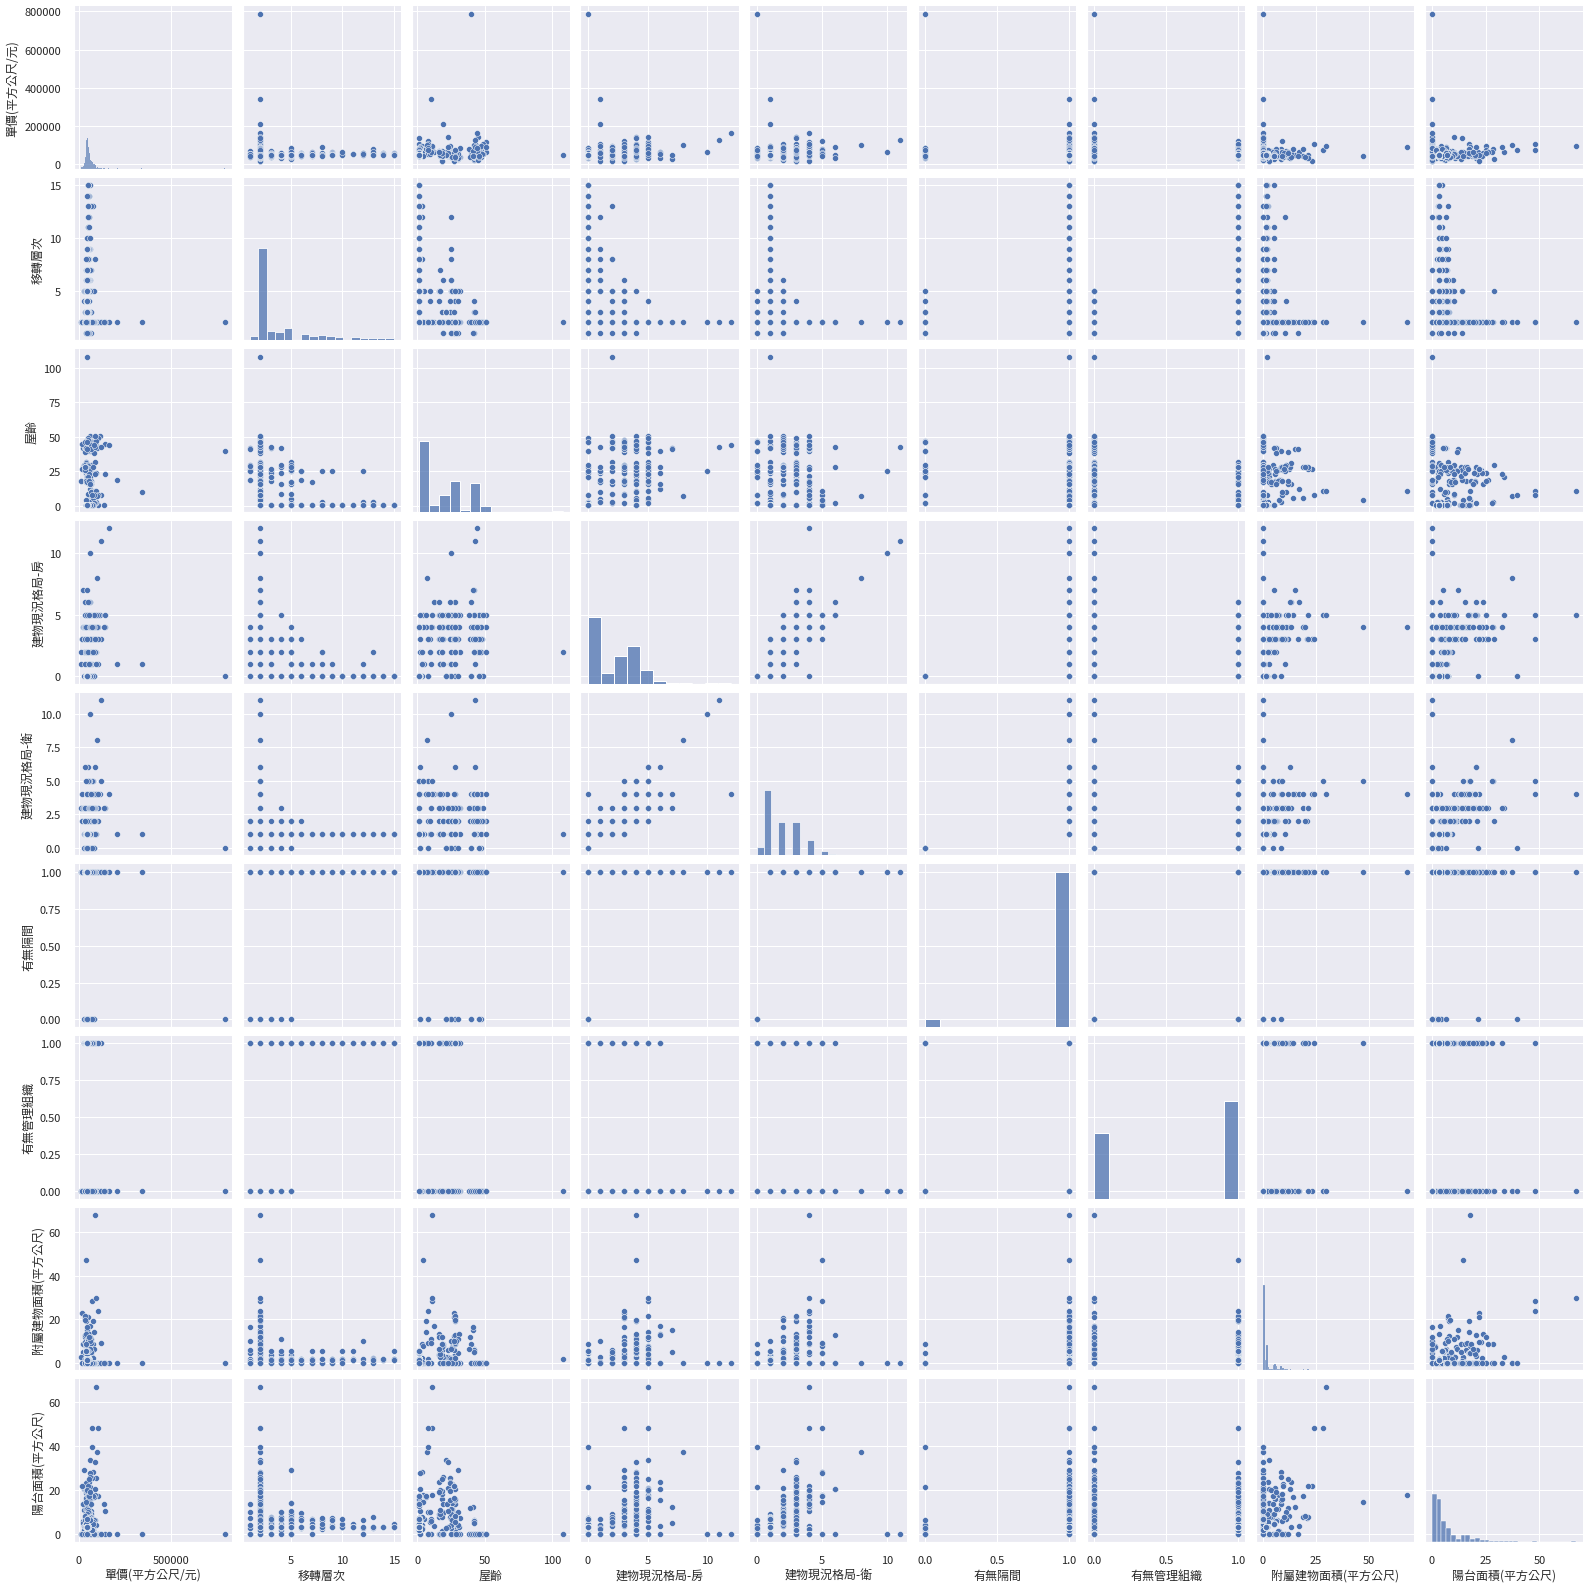

In [ ]:
#了解變項間關聯性
sns.pairplot(_2022_Q3_Longtan_Dist_linear_regression)  #繪製pairplot
sns.set(font=font.get_name(),font_scale=1.4)
plt.show()  #顯示圖表  #seaborn 是建構在 matplotlib 之上，所以仍須呼叫 matplotlib 的 plt.show() 來顯示圖表。

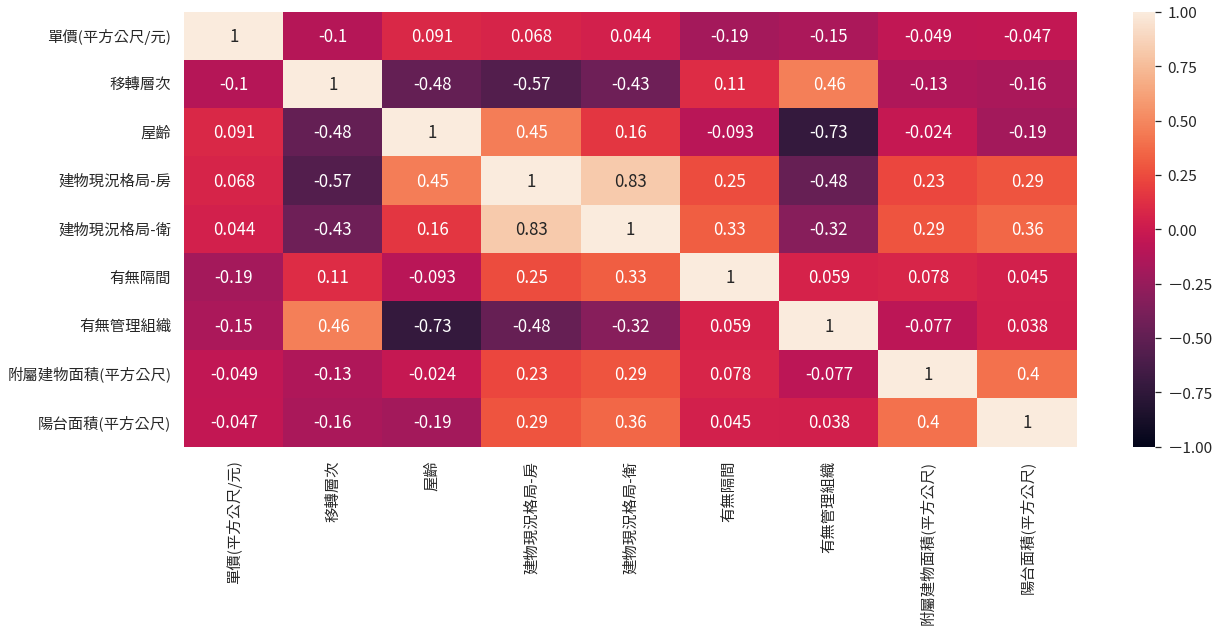

In [ ]:
#了解變項間關聯性--繪製熱圖
#用sns.set()會變亂碼，要加font=font.get_name()
plt.figure(figsize=(20,8))
sns.set(font=font.get_name(),font_scale=1.4)
# plt.xtick.labelsize(fontsize=20)
#plt.ylabel(fontsize=20)
g = sns.heatmap(_2022_Q3_Longtan_Dist_linear_regression.corr(), annot=True, vmin=-1, vmax=1)
#.corr(): 輸入相關係數矩陣當作畫圖的資料。
#annot=True: 將資料顯示在圖上。
#vmin=-1, vmax=1: 圖右側、縱欄呈現相關強度，依據相關係數將其調整為最小值 -1、最大值是 +1。
#設定資料的最小、最大值，是為了可以維持熱圖色調的統一；若不指定資料的最小、最大值，color bar就會對應資料中出現的最小、最大值。

plt.show()  #圖中最右側是color bar，呈現顏色和數值的對照關係。

##**4-2.學習訓練**

In [ ]:
#設定訓練集和測試集的X跟Y

y = _2022_Q3_Longtan_Dist_linear_regression['單價(平方公尺/元)'] 

X = _2022_Q3_Longtan_Dist_linear_regression[['移轉層次','屋齡','建物現況格局-房','建物現況格局-衛', '有無隔間', '有無管理組織','附屬建物面積(平方公尺)','陽台面積(平方公尺)']] #這些作為預測變項(predictor)(迴歸分析中的X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1357)

print('y_train','\n',y_train)
print('X_train','\n',X_train)
print('y_test','\n',y_test)
print('X_test','\n',X_test)

y_train 
 2046     43229.0
5882     87086.0
2037     73909.0
1297     47135.0
3461     82192.0
          ...   
11828    44178.0
6462     33247.0
2385     53828.0
11850    46581.0
11432    41237.0
Name: 單價(平方公尺/元), Length: 257, dtype: float64
X_train 
        移轉層次  屋齡  建物現況格局-房  建物現況格局-衛  有無隔間  有無管理組織  附屬建物面積(平方公尺)  陽台面積(平方公尺)
2046      5  26         3         2     1       1          0.00       14.05
5882      2  42         4         3     1       0          0.00        0.00
2037      2  11         5         5     1       0         28.43       47.97
1297      3  27         3         2     1       1          0.00        5.72
3461      2  41         3         2     1       0          0.00        0.00
...     ...  ..       ...       ...   ...     ...           ...         ...
11828     5   1         0         1     1       1          1.83        3.50
6462      2  30         3         2     1       0          0.00        4.10
2385      7   1         0         1     1       1          1.83

In [ ]:
#建構訓練集
regr = LinearRegression().fit(X_train, y_train)

In [ ]:
#係數
print("Coefficients: \n", '移轉層次',regr.coef_[0], '屋齡',regr.coef_[1], '建物現況格局-房',regr.coef_[2], 
  '建物現況格局-衛',regr.coef_[3], '有無隔間',regr.coef_[4],'\n', '有無管理組織',regr.coef_[5], '附屬建物面積(平方公尺)',regr.coef_[6], '陽台面積(平方公尺)',regr.coef_[7])

Coefficients: 
 移轉層次 -594.7956520775118 屋齡 -478.28731134140946 建物現況格局-房 3014.8310094085778 建物現況格局-衛 -145.88321474166662 有無隔間 -2124.418803494228 
 有無管理組織 -16559.45785975452 附屬建物面積(平方公尺) -442.1355854667573 陽台面積(平方公尺) -236.69305673882607


In [ ]:
#用X測試集預測Y值
y_pred = regr.predict(X_test)

In [ ]:
#將實際值以及預測值做成DataFrame以方便判讀，並加上'預測 - 實際'欄位方便比較
yt_and_yp = pd.DataFrame()
yt_and_yp['實際值'] = y_test
yt_and_yp['預測值'] = y_pred
yt_and_yp['預測 - 實際'] = y_pred - y_test
yt_and_yp

,實際值,預測值,預測 - 實際
4855,54902.0,65706.766794,10804.766794
3890,32053.0,67557.801466,35504.801466
11905,45035.0,54325.509291,9290.509291
964,64676.0,49540.890183,-15135.109817
11539,46473.0,54261.220033,7788.220033
...,...,...,...
8231,122724.0,85328.334155,-37395.665845
11421,58409.0,52621.215842,-5787.784158
1805,14910.0,67039.764788,52129.764788
11273,57526.0,51223.334648,-6302.665352


最小差距為39左右
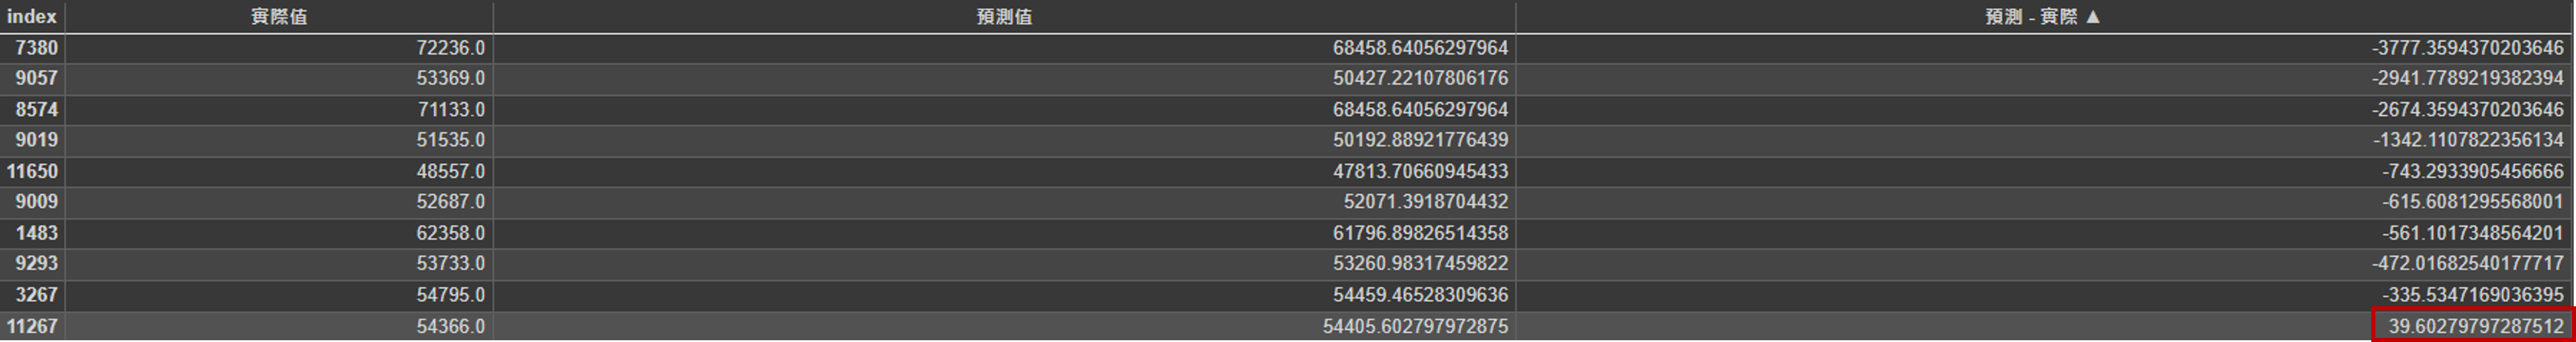

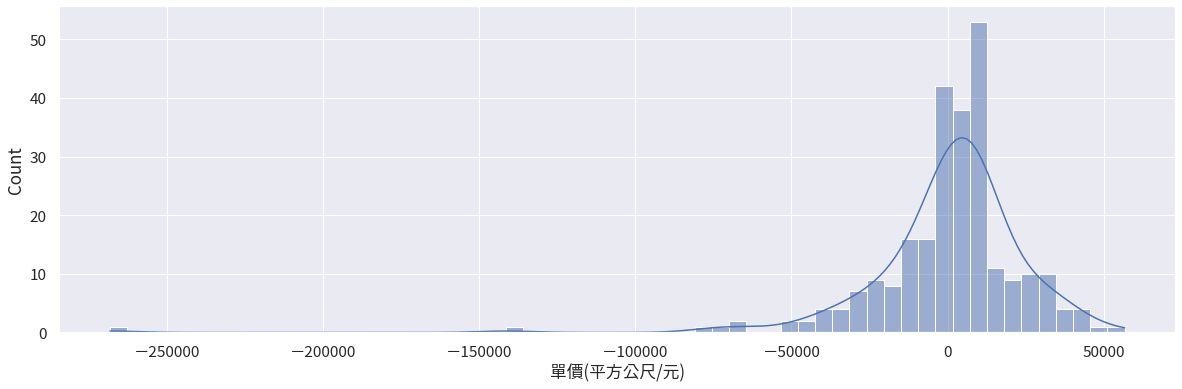

In [ ]:
#繪製殘差圖(看是否呈常態分佈)
plt.figure(figsize=(20,6))
train_pred = regr.predict(X_train)  #訓練集
sns.histplot(data = train_pred - y_train, kde=True)  #(訓練集的預測值 - 訓練集的實際值)

**呈左偏態：**左側的尾部更長，分布的主體集中在右側。

##**4-3.測試評估**

**以兩項指標:**  
* MSE      
* R2

**MSE(均方誤差)公式:**

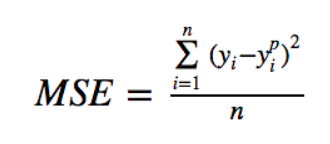

<font color = 'red'>**MSE 越小越好**</font>

**R2（判定係數）公式：**

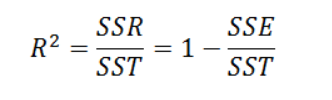

SSR為y軸數值迴歸平方和

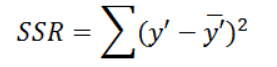 

SSE為y軸數值殘差平方和

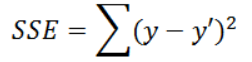

SST為y軸數值之總平方和

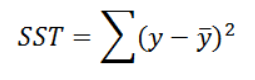

SSR + SSE = SST

y' = y_pred (y預測值)

y = y_test (y實際值)

(y上面有橫線代表平均)

用以解釋X軸與Y軸變項之直線關係的強弱(%數)，所以<font color = 'red'>**R2越大越好(趨近1)**<font>

In [ ]:
#使用 MSE(The mean squared error) 中文:均方誤差 和 R2(The coefficient of determination) 中文:判定係數 來確定模型的預測效果
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Mean squared error: 6488224765.28
Coefficient of determination: -0.01


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
import numpy as np

#Reshape new data using array.reshape(1, -1) if it contains a single sample.
Xnew = np.array([2, 1, 2, 1, 1, 1, 1.83, 6.35]).reshape(1, -1)

# make a prediction
ynew = regr.predict(Xnew)
# show the inputs and predicted outputs
print(Xnew)
print(ynew)

[[2.   1.   2.   1.   1.   1.   1.83 6.35]]
[60870.18740259]


##**4-4.模型之優化與比較**

可能是非數值型欄位太多，只留下 '附屬建物面積(平方公尺)', '陽台面積(平方公尺)' 試試看

In [ ]:
#設定訓練集和測試集的X跟Y

y = _2022_Q3_Longtan_Dist_linear_regression['單價(平方公尺/元)'] 

X = _2022_Q3_Longtan_Dist_linear_regression[['附屬建物面積(平方公尺)','陽台面積(平方公尺)']] #這些作為預測變項(predictor)(迴歸分析中的X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1357)

# print('y_train','\n',y_train)
# print('X_train','\n',X_train)
# print('y_test','\n',y_test)
# print('X_test','\n',X_test)

In [ ]:
#建構訓練集
regr = LinearRegression().fit(X_train, y_train)

In [ ]:
#係數
print("Coefficients: \n", '附屬建物面積(平方公尺)',regr.coef_[0], '陽台面積(平方公尺)',regr.coef_[1])

Coefficients: 
 附屬建物面積(平方公尺) -280.8811974916138 陽台面積(平方公尺) 114.15863066530919


In [ ]:
#用X測試集預測Y值
y_pred = regr.predict(X_test)

In [ ]:
#將實際值以及預測值做成DataFrame以方便判讀，並加上'預測 - 實際'欄位方便比較
yt_and_yp = pd.DataFrame()
yt_and_yp['實際值'] = y_test
yt_and_yp['預測值'] = y_pred
yt_and_yp['預測 - 實際'] = y_pred - y_test
yt_and_yp

,實際值,預測值,預測 - 實際
4855,54902.0,59749.857085,4847.857085
3890,32053.0,56998.751883,24945.751883
11905,45035.0,58155.903848,13120.903848
964,64676.0,58270.361232,-6405.638768
11539,46473.0,59091.161786,12618.161786
...,...,...,...
8231,122724.0,58270.361232,-64453.638768
11421,58409.0,59021.525021,612.525021
1805,14910.0,57467.041007,42557.041007
11273,57526.0,59121.984616,1595.984616


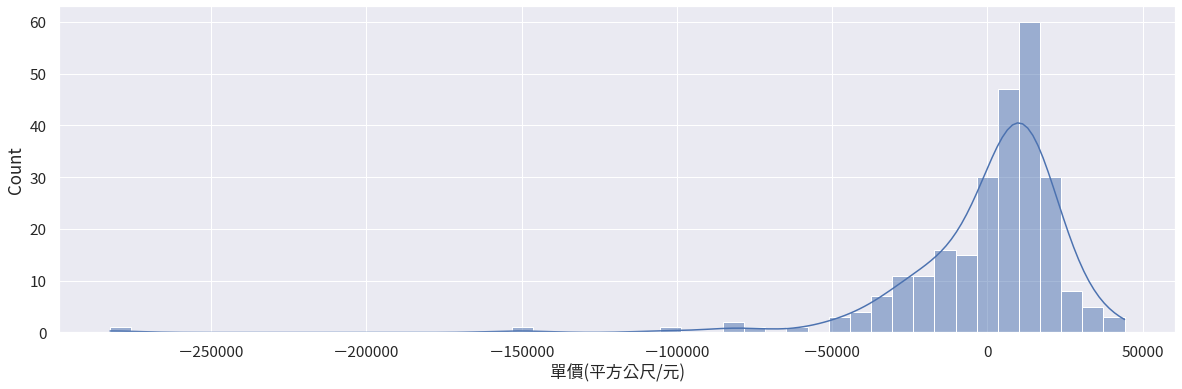

In [ ]:
#繪製殘差圖(看是否呈常態分佈)
plt.figure(figsize=(20,6))
train_pred = regr.predict(X_train)  #訓練集
sns.histplot(data = train_pred - y_train, kde=True)  #(訓練集的預測值 - 訓練集的實際值)

**呈左偏態：**左側的尾部更長，分布的主體集中在右側。 (一樣)

In [ ]:
#使用 MSE(The mean squared error) 中文:均方誤差 和 R2(The coefficient of determination) 中文:判定係數 來確定模型的預測效果
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Mean squared error: 6476099933.50
Coefficient of determination: -0.01


同樣不準確

##**重新選取變數**

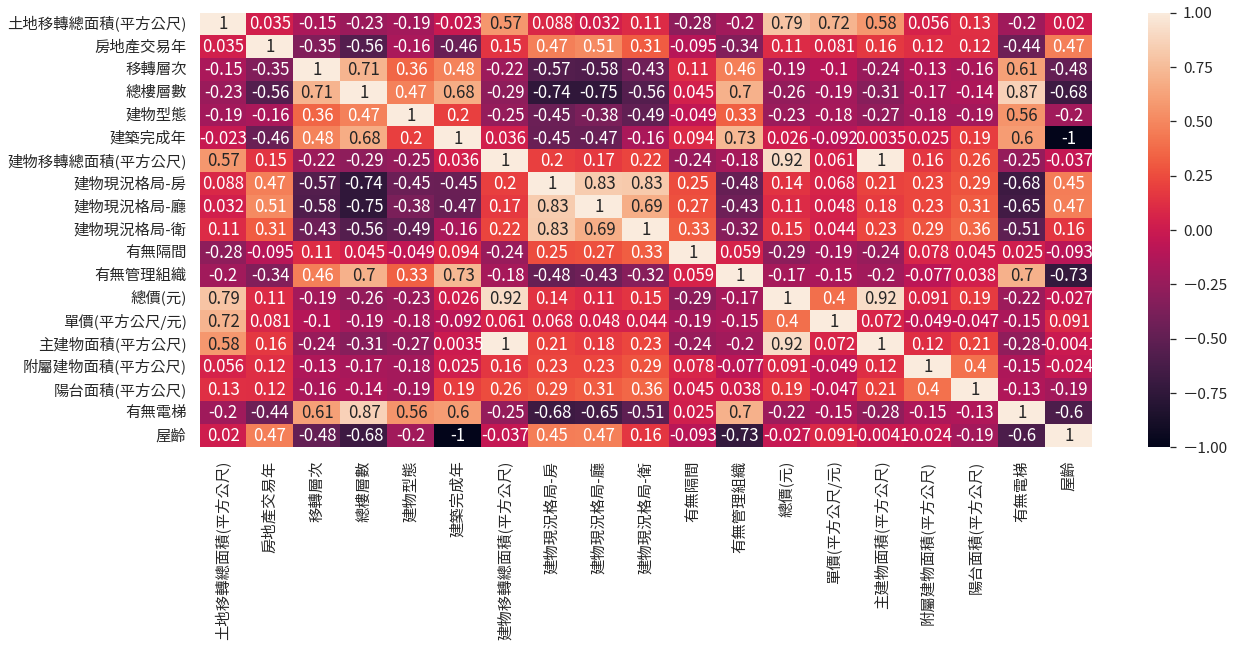

In [ ]:
#查看總表的熱圖
plt.figure(figsize = (20,8))
sns.heatmap(_2022_Q3_Longtan_Dist.corr(), annot=True, vmin=-1, vmax=1)
sns.set(font=font.get_name())
plt.show()

可發現**'單價(平方公尺/元)'**與其他項的**相關係數**基本上**偏低**，<font color = 'red'>**極有可能為預測不準的主因**</font>，所以我決定重新建構模型，**y**選擇**'總樓層數'**(與多項相關性高)，**x**選擇**'移轉層次'、'建物現況格局-房'、'建物現況格局-廳'、'有無管理組織'、'有無電梯'**
(相關係數最高前五位) 

**※** 這裡沒選擇**'總價(元)'**是因為相關係數極高的項皆與面積有關，總價 = 總面積 * 單價，很直觀地，**總價牽扯面積**，跑迴歸的意義不大

In [ ]:
#將需要的columns挑出來
_adjust_2022_Q3_Longtan_Dist_linear_regression = pd.DataFrame(_2022_Q3_Longtan_Dist.loc[:,['總樓層數','移轉層次', '建物現況格局-房', '建物現況格局-廳',
       '有無管理組織', '有無電梯']])
_adjust_2022_Q3_Longtan_Dist_linear_regression

,總樓層數,移轉層次,建物現況格局-房,建物現況格局-廳,有無管理組織,有無電梯
5,2,2,3,2,0,0
31,14,3,1,1,1,1
38,14,2,0,0,1,1
39,6,2,2,2,1,1
102,5,4,0,0,0,0
...,...,...,...,...,...,...
11905,15,4,0,0,1,1
11907,15,4,0,0,1,1
11908,15,6,0,0,1,1
11909,15,3,0,0,1,1


In [ ]:
#設定訓練集和測試集的X跟Y
_adjust_y = _adjust_2022_Q3_Longtan_Dist_linear_regression['總樓層數'] 

_adjust_X = _adjust_2022_Q3_Longtan_Dist_linear_regression[['移轉層次','建物現況格局-房','建物現況格局-廳','有無管理組織','有無電梯']] #這些作為預測變項(predictor)(迴歸分析中的X)

_adjust_X_train, _adjust_X_test, _adjust_y_train, _adjust_y_test = train_test_split(_adjust_X, _adjust_y, test_size = 0.25, random_state = 1357)

print('y_train','\n',_adjust_y_train)
print('X_train','\n',_adjust_X_train)
print('y_test','\n',_adjust_y_test)
print('X_test','\n',_adjust_X_test)

y_train 
 2046     14
5882      2
2037      3
1297      6
3461      2
         ..
11828    15
6462      5
2385     15
11850    15
11432    15
Name: 總樓層數, Length: 257, dtype: int64
X_train 
        移轉層次  建物現況格局-房  建物現況格局-廳  有無管理組織  有無電梯
2046      5         3         2       1     1
5882      2         4         2       0     0
2037      2         5         3       0     0
1297      3         3         2       1     1
3461      2         3         3       0     0
...     ...       ...       ...     ...   ...
11828     5         0         0       1     1
6462      2         3         2       0     0
2385      7         0         0       1     1
11850     9         0         0       1     1
11432     7         0         0       1     1

[257 rows x 5 columns]
y_test 
 4855      4
3890      4
11905    15
964      10
11539    15
         ..
8231      2
11421    15
1805      3
11273    15
5651      4
Name: 總樓層數, Length: 86, dtype: int64
X_test 
        移轉層次  建物現況格局-房  建物現況格局-廳  有無管理組織  有無電梯
4

In [ ]:
#建構訓練集
_adjust_regr = LinearRegression().fit(_adjust_X_train, _adjust_y_train)

In [ ]:
#係數
print("Coefficients: \n", '移轉層次',_adjust_regr.coef_[0], '建物現況格局-房',_adjust_regr.coef_[1], '建物現況格局-廳',_adjust_regr.coef_[2], 
  '有無管理組織',_adjust_regr.coef_[3], '有無電梯',_adjust_regr.coef_[4])

Coefficients: 
 移轉層次 0.34874492310048777 建物現況格局-房 -0.2667641668915244 建物現況格局-廳 -1.1699253550722981 有無管理組織 2.101005320608678 有無電梯 4.553420130018969


In [ ]:
#用X測試集預測Y值
_adjust_y_pred = _adjust_regr.predict(_adjust_X_test)

In [ ]:
#將實際值以及預測值做成DataFrame以方便判讀，並加上'預測 - 實際'欄位方便比較
_adjust_yt_and_yp = pd.DataFrame()
_adjust_yt_and_yp['實際值'] = _adjust_y_test
_adjust_yt_and_yp['預測值'] = _adjust_y_pred
_adjust_yt_and_yp['預測 - 實際'] = _adjust_y_pred - _adjust_y_test
_adjust_yt_and_yp

,實際值,預測值,預測 - 實際
4855,4,4.330183,0.330183
3890,4,1.695649,-2.304351
11905,15,12.988000,-2.012000
964,10,12.597545,2.597545
11539,15,12.988000,-2.012000
...,...,...,...
8231,2,1.531753,-0.468247
11421,15,14.034235,-0.965765
1805,3,9.922741,6.922741
11273,15,14.731725,-0.268275


最小誤差為-0.037左右
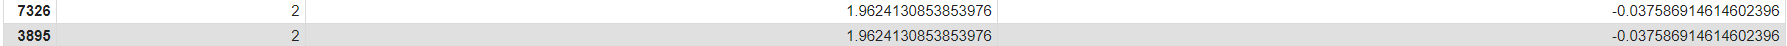

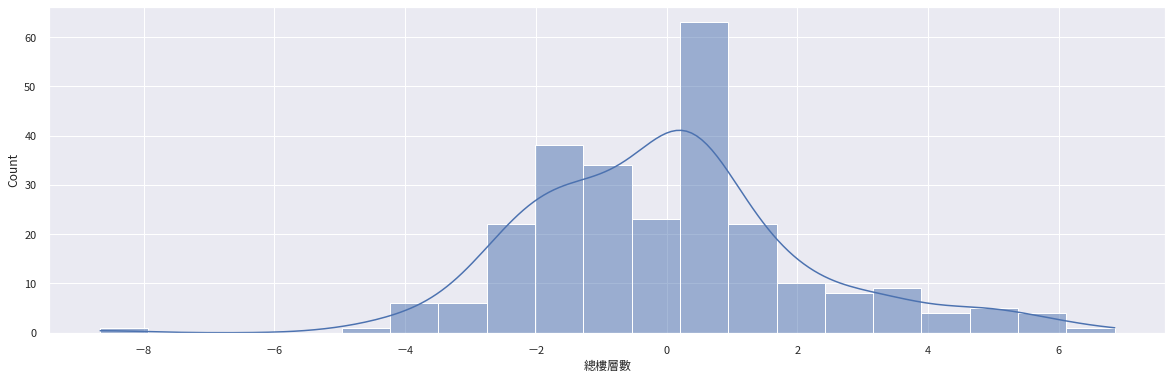

In [ ]:
#繪製殘差圖(看是否呈常態分佈)
plt.figure(figsize=(20,6))
_adjust_train_pred = _adjust_regr.predict(_adjust_X_train)  #訓練集
sns.histplot(data = _adjust_train_pred - _adjust_y_train, kde=True)  #(訓練集的預測值 - 訓練集的實際值)

In [ ]:
#使用 MSE(The mean squared error) 中文:均方誤差 和 R2(The coefficient of determination) 中文:判定係數 來確定模型的預測效果
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(_adjust_y_test, _adjust_y_pred))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(_adjust_y_test, _adjust_y_pred))

Mean squared error: 4.74
Coefficient of determination: 0.85


<font size = '5'>MSE僅個位數，判定係數提升至0.85，屬於不錯的預測結果</font>


#**5.機器學習2--預測分類型欄位**

**問題2:**可以用 **建物現況格局-房、建物現況格局-衛、附屬建物面積(平方公尺)、陽台面積(平方公尺)、有無隔間、有無電梯、有無管理組織** 這些欄位預測**建物型態**嗎?


##**5-1.模型選擇--特徵組合與演算法**

KNN (K 近鄰) 預測模型

In [ ]:
#將需要的columns挑出來
_2022_Q3_Longtan_Dist_KNN = pd.DataFrame(_2022_Q3_Longtan_Dist.loc[:,['建物型態','建物現況格局-房','建物現況格局-衛','附屬建物面積(平方公尺)','陽台面積(平方公尺)','有無隔間','有無電梯','有無管理組織']])
_2022_Q3_Longtan_Dist_KNN

,建物型態,建物現況格局-房,建物現況格局-衛,附屬建物面積(平方公尺),陽台面積(平方公尺),有無隔間,有無電梯,有無管理組織
5,0,3,2,0.00,6.00,1,0,0
31,1,1,1,0.00,4.12,1,1,1
38,1,0,0,0.00,4.12,0,1,1
39,2,2,1,0.00,6.22,1,1,1
102,3,0,0,0.00,2.07,0,0,0
...,...,...,...,...,...,...,...,...
11905,1,0,1,1.83,3.50,1,1,1
11907,1,0,1,1.23,3.50,1,1,1
11908,1,0,1,1.23,3.50,1,1,1
11909,1,0,1,1.23,3.50,1,1,1


探索性分析--描述資料內容

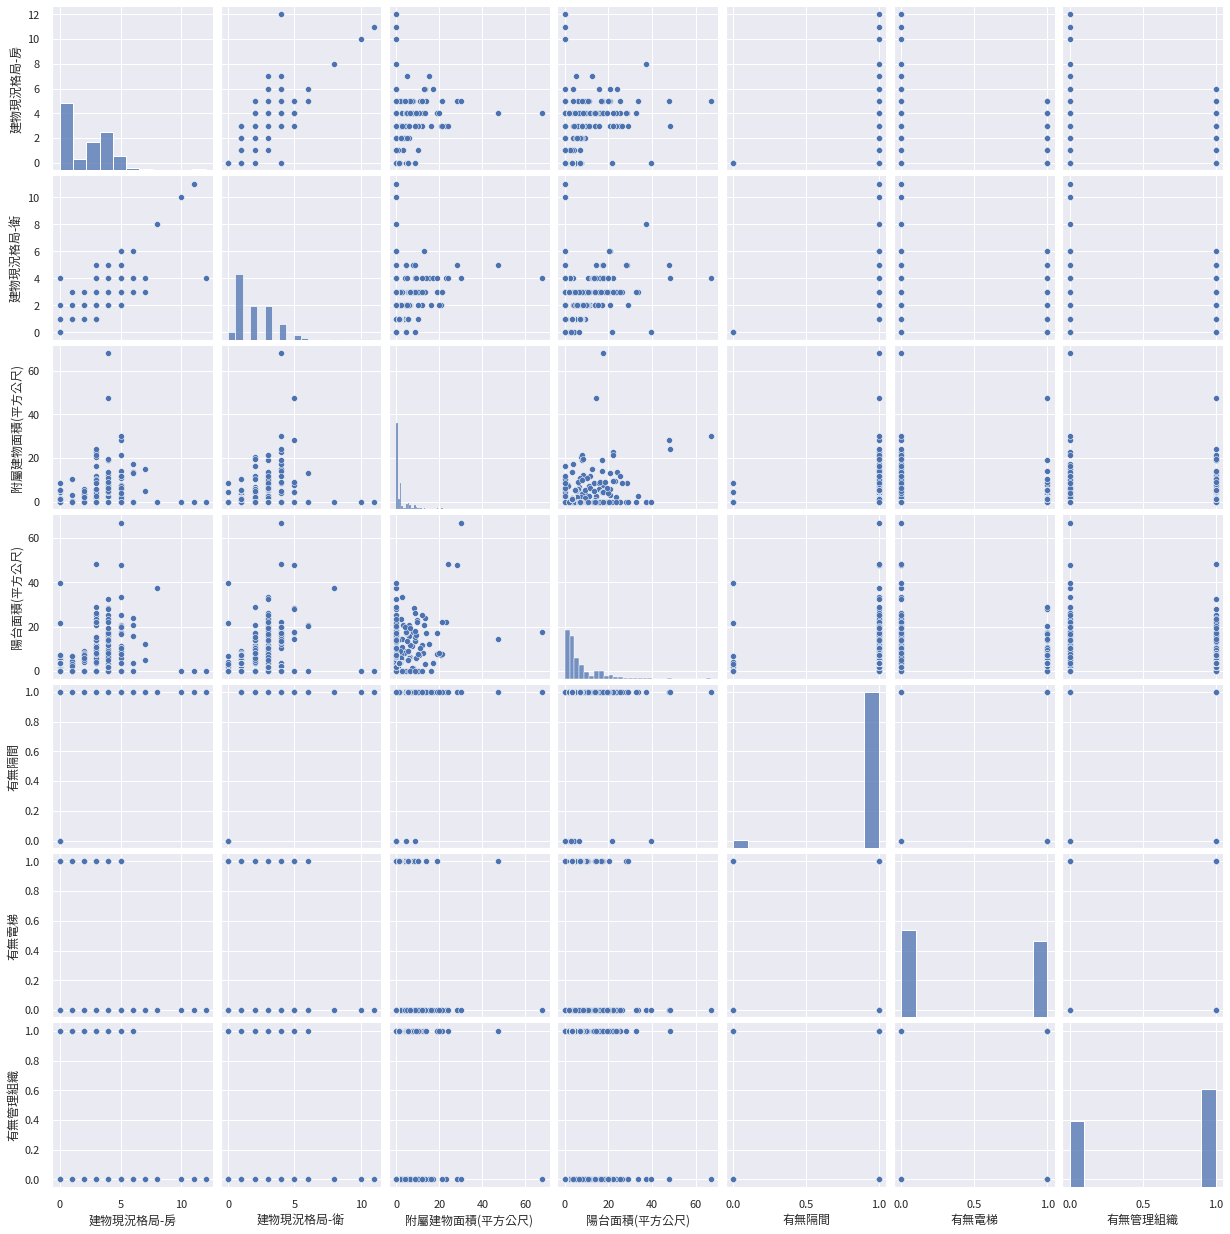

In [ ]:
######
sns.pairplot(_2022_Q3_Longtan_Dist_KNN.iloc[:, 1:])  #繪製pairplot
######

plt.show()  #顯示圖表  #seaborn 是建構在 matplotlib 之上，所以仍須呼叫 matplotlib 的 plt.show() 來顯示圖表。

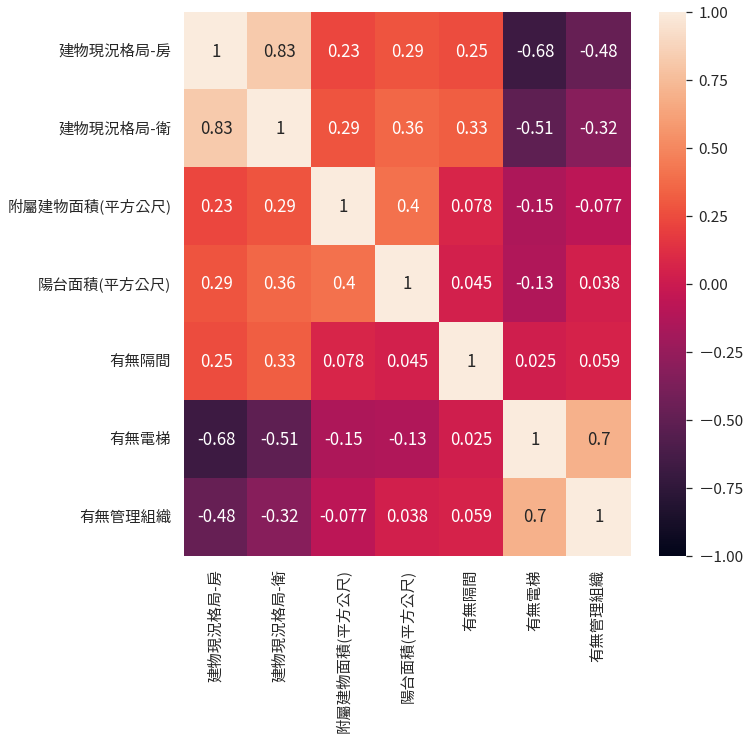

In [ ]:
#用熱圖 (heat map) 做視覺化

sns.set(rc={"figure.figsize":(10, 10)}) #width=10, #height=10
sns.set(font=font.get_name(),font_scale=1.4)  #調整圖表文字。

sns.heatmap(_2022_Q3_Longtan_Dist_KNN.iloc[:, 1:].corr(), annot=True, vmin=-1, vmax=1)
#df.corr(): 輸入相關係數矩陣當作畫圖的資料。
#annot=True: 將資料顯示在圖上。
#vmin=-1, vmax=1: 圖右側、縱欄呈現相關強度，依據相關係數將其調整為最小值 -1、最大值是 +1。
#設定資料的最小、最大值，是為了可以維持熱圖色調的統一；若不指定資料的最小、最大值，color bar就會對應資料中出現的最小、最大值。

plt.show()  #圖中最右側是color bar，呈現顏色和數值的對照關係。


##**5-2.學習訓練**

In [ ]:
#將要當作x的columns挑出來
data = np.array(_2022_Q3_Longtan_Dist_KNN.loc[:,['建物現況格局-房','建物現況格局-衛','附屬建物面積(平方公尺)','陽台面積(平方公尺)','有無隔間','有無電梯','有無管理組織']])

In [ ]:
#查看x
data

array([[3.  , 2.  , 0.  , ..., 1.  , 0.  , 0.  ],
       [1.  , 1.  , 0.  , ..., 1.  , 1.  , 1.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 1.  ],
       ...,
       [0.  , 1.  , 1.23, ..., 1.  , 1.  , 1.  ],
       [0.  , 1.  , 1.23, ..., 1.  , 1.  , 1.  ],
       [4.  , 3.  , 0.  , ..., 1.  , 0.  , 0.  ]])

In [ ]:
# target = y
target = np.array(_2022_Q3_Longtan_Dist_KNN['建物型態'])

In [ ]:
#進行資料分割，分割成四個numpy.ndarray
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.2, random_state=1357)

In [ ]:
#使用上一步驟的data_train, data_test, target_train, target_test

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)  #取5個鄰居
knn.fit(data_train, target_train)  #做訓練
predictions = knn.predict(data_test) #預測y

print('預測值:',predictions)
print('實際值:',target_test)

預測值: [0 0 1 2 1 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 2 2 0 0 1 0 2 2 1 1 1 1 2
 1 0 1 1 0 0 0 0 2 0 0 1 1 0 1 1 0 0 0 0 1 1 0 1 2 0 1 1 0 1 1 1]
實際值: [0 0 1 2 1 0 1 1 1 0 0 3 1 0 0 1 0 0 0 0 0 0 0 3 2 2 0 0 1 0 0 2 1 2 1 1 0
 1 3 1 1 2 0 0 0 1 0 0 1 1 3 1 1 0 0 0 0 1 1 0 1 1 0 1 1 0 1 1 1]


##**5-3.測試評估**

評估預測結果

In [ ]:
#預測成功的比例

print('訓練集',knn.score(data_train, target_train).round(3))
print('測試集',knn.score(data_test, target_test).round(3))

訓練集 0.912
測試集 0.855


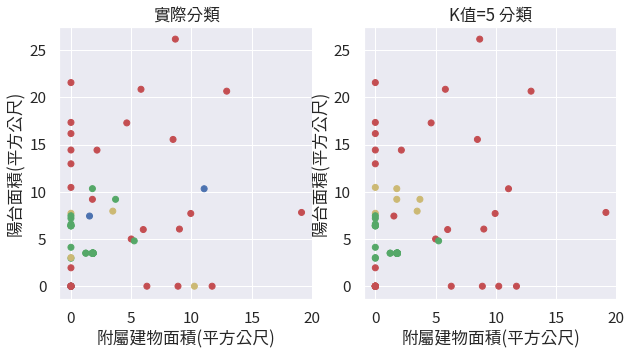

In [ ]:
#將實際值和預測值畫成散佈圖
_data_test =pd.DataFrame(data_test, columns = ['建物現況格局-房','建物現況格局-衛','附屬建物面積(平方公尺)','陽台面積(平方公尺)','有無隔間','有無電梯','有無管理組織'])
colmap = np.array(["r", "g", "y", "b"]) # 四個點的顏色
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1) # 繪製1*2的子圖中的第1個
plt.subplots_adjust(hspace = .5)
plt.scatter(_data_test["附屬建物面積(平方公尺)"], _data_test["陽台面積(平方公尺)"],
            color=colmap[target_test]) # 繪製實際值的散佈圖
plt.xlabel("附屬建物面積(平方公尺)")
plt.ylabel("陽台面積(平方公尺)")
plt.title("實際分類")

plt.subplot(1, 2, 2) # 繪製1*2的子圖中的第2個
plt.scatter(_data_test["附屬建物面積(平方公尺)"], _data_test["陽台面積(平方公尺)"], 
            color=colmap[predictions]) # 繪製預測結果的散佈圖
plt.xlabel("附屬建物面積(平方公尺)")
plt.ylabel("陽台面積(平方公尺)")
plt.title("K值=5 分類")
plt.show()

紅色、綠色有分類出來，但黃色、藍色的分類沒那麼準確

In [ ]:
#列印混淆矩陣 confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(target_test, predictions))

[[29  0  2  0]
 [ 0 26  2  0]
 [ 1  1  4  0]
 [ 4  0  0  0]]


##**5-4.模型之優化與比較**

In [ ]:
#比較不同K值的錯誤率
import numpy as np
import matplotlib.pyplot as plt

error = []

#計算K值在0~25間的誤差
for i in range(1, 25):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(data_train, target_train)
    pred_i = knn.predict(data_test)
    error.append(np.mean(pred_i != target_test))

Text(0, 0.5, 'Mean Error')

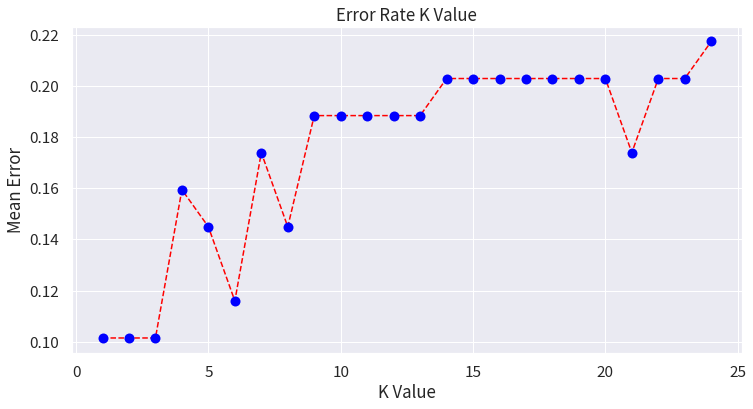

In [ ]:
#畫出圖形
plt.figure(figsize=(12, 6))
plt.plot(range(1, 25), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

或許K值=1、2、3會有更好的預測能力

##K值帶入1、2、3

###K值=1

In [ ]:
#使用上一步驟的data_train, data_test, target_train, target_test

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)  #取1個鄰居
knn.fit(data_train, target_train)  #做訓練
predictions = knn.predict(data_test) #預測y

print('預測值:',predictions)
print('實際值:',target_test)

預測值: [0 0 1 2 1 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 3 1 2 0 0 1 0 0 2 1 2 1 1 0
 1 0 1 1 0 0 0 0 2 0 0 1 1 0 1 1 0 0 0 0 1 1 0 1 2 0 1 1 0 1 1 1]
實際值: [0 0 1 2 1 0 1 1 1 0 0 3 1 0 0 1 0 0 0 0 0 0 0 3 2 2 0 0 1 0 0 2 1 2 1 1 0
 1 3 1 1 2 0 0 0 1 0 0 1 1 3 1 1 0 0 0 0 1 1 0 1 1 0 1 1 0 1 1 1]


In [ ]:
#預測成功的比例

print('訓練集',knn.score(data_train, target_train).round(3))
print('測試集',knn.score(data_test, target_test).round(3))

訓練集 0.996
測試集 0.899


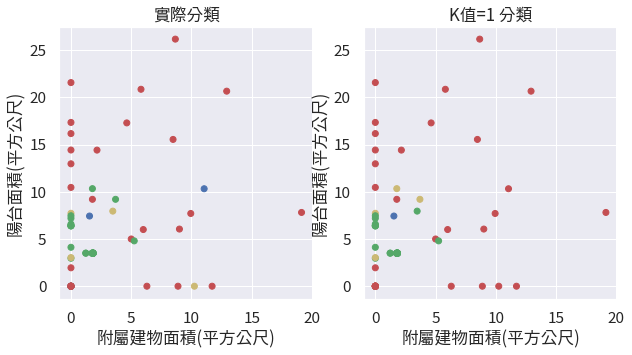

In [ ]:
#將實際值和預測值畫成散佈圖
_data_test =pd.DataFrame(data_test, columns = ['建物現況格局-房','建物現況格局-衛','附屬建物面積(平方公尺)','陽台面積(平方公尺)','有無隔間','有無電梯','有無管理組織'])
colmap = np.array(["r", "g", "y", "b"]) # 四個點的顏色
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1) # 繪製1*2的子圖中的第1個
plt.subplots_adjust(hspace = .5)
plt.scatter(_data_test["附屬建物面積(平方公尺)"], _data_test["陽台面積(平方公尺)"],
            color=colmap[target_test]) # 繪製實際值的散佈圖
plt.xlabel("附屬建物面積(平方公尺)")
plt.ylabel("陽台面積(平方公尺)")
plt.title("實際分類")

plt.subplot(1, 2, 2) # 繪製1*2的子圖中的第2個
plt.scatter(_data_test["附屬建物面積(平方公尺)"], _data_test["陽台面積(平方公尺)"], 
            color=colmap[predictions]) # 繪製預測結果的散佈圖
plt.xlabel("附屬建物面積(平方公尺)")
plt.ylabel("陽台面積(平方公尺)")
plt.title("K值=1 分類")
plt.show()

In [ ]:
#列印混淆矩陣 confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(target_test, predictions))

[[31  0  0  0]
 [ 0 26  2  0]
 [ 1  1  4  0]
 [ 3  0  0  1]]


###K值=2

In [ ]:
#使用上一步驟的data_train, data_test, target_train, target_test

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)  #取2個鄰居
knn.fit(data_train, target_train)  #做訓練
predictions = knn.predict(data_test) #預測y

print('預測值:',predictions)
print('實際值:',target_test)

預測值: [0 0 1 2 1 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 2 0 0 1 0 0 2 1 2 1 1 0
 1 0 1 1 0 0 0 0 2 0 0 1 1 0 1 1 0 0 0 0 1 1 0 1 1 0 1 1 0 1 1 1]
實際值: [0 0 1 2 1 0 1 1 1 0 0 3 1 0 0 1 0 0 0 0 0 0 0 3 2 2 0 0 1 0 0 2 1 2 1 1 0
 1 3 1 1 2 0 0 0 1 0 0 1 1 3 1 1 0 0 0 0 1 1 0 1 1 0 1 1 0 1 1 1]


In [ ]:
#預測成功的比例

print('訓練集',knn.score(data_train, target_train).round(3))
print('測試集',knn.score(data_test, target_test).round(3))

訓練集 0.938
測試集 0.899


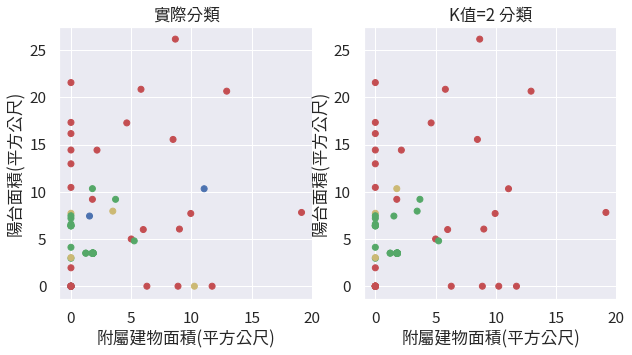

In [ ]:
#將實際值和預測值畫成散佈圖
_data_test =pd.DataFrame(data_test, columns = ['建物現況格局-房','建物現況格局-衛','附屬建物面積(平方公尺)','陽台面積(平方公尺)','有無隔間','有無電梯','有無管理組織'])
colmap = np.array(["r", "g", "y", "b"]) # 四個點的顏色
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1) # 繪製1*2的子圖中的第1個
plt.subplots_adjust(hspace = .5)
plt.scatter(_data_test["附屬建物面積(平方公尺)"], _data_test["陽台面積(平方公尺)"],
            color=colmap[target_test]) # 繪製實際值的散佈圖
plt.xlabel("附屬建物面積(平方公尺)")
plt.ylabel("陽台面積(平方公尺)")
plt.title("實際分類")

plt.subplot(1, 2, 2) # 繪製1*2的子圖中的第2個
plt.scatter(_data_test["附屬建物面積(平方公尺)"], _data_test["陽台面積(平方公尺)"], 
            color=colmap[predictions]) # 繪製預測結果的散佈圖
plt.xlabel("附屬建物面積(平方公尺)")
plt.ylabel("陽台面積(平方公尺)")
plt.title("K值=2 分類")
plt.show()

In [ ]:
#列印混淆矩陣 confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(target_test, predictions))

[[31  0  0  0]
 [ 0 27  1  0]
 [ 1  1  4  0]
 [ 3  1  0  0]]


###K值=3

In [ ]:
#使用上一步驟的data_train, data_test, target_train, target_test

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)  #取3個鄰居
knn.fit(data_train, target_train)  #做訓練
predictions = knn.predict(data_test) #預測y

print('預測值:',predictions)
print('實際值:',target_test)

預測值: [0 0 1 2 1 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 2 2 0 0 1 0 0 2 2 2 1 1 0
 1 0 1 1 0 0 0 0 2 0 0 1 1 0 1 1 0 0 0 0 1 1 0 1 1 0 1 1 0 1 1 1]
實際值: [0 0 1 2 1 0 1 1 1 0 0 3 1 0 0 1 0 0 0 0 0 0 0 3 2 2 0 0 1 0 0 2 1 2 1 1 0
 1 3 1 1 2 0 0 0 1 0 0 1 1 3 1 1 0 0 0 0 1 1 0 1 1 0 1 1 0 1 1 1]


In [ ]:
#預測成功的比例

print('訓練集',knn.score(data_train, target_train).round(3))
print('測試集',knn.score(data_test, target_test).round(3))

訓練集 0.927
測試集 0.899


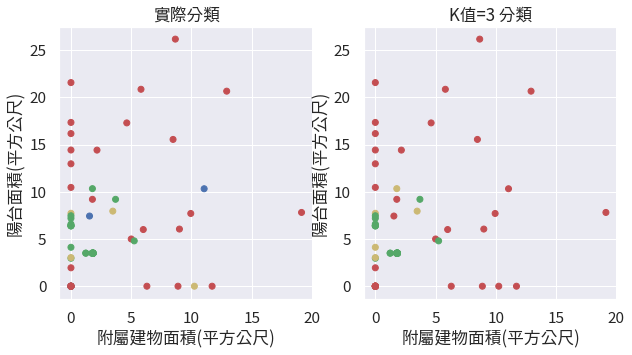

In [ ]:
#將實際值和預測值畫成散佈圖
_data_test =pd.DataFrame(data_test, columns = ['建物現況格局-房','建物現況格局-衛','附屬建物面積(平方公尺)','陽台面積(平方公尺)','有無隔間','有無電梯','有無管理組織'])
colmap = np.array(["r", "g", "y", "b"]) # 四個點的顏色
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1) # 繪製1*2的子圖中的第1個
plt.subplots_adjust(hspace = .5)
plt.scatter(_data_test["附屬建物面積(平方公尺)"], _data_test["陽台面積(平方公尺)"],
            color=colmap[target_test]) # 繪製實際值的散佈圖
plt.xlabel("附屬建物面積(平方公尺)")
plt.ylabel("陽台面積(平方公尺)")
plt.title("實際分類")

plt.subplot(1, 2, 2) # 繪製1*2的子圖中的第2個
plt.scatter(_data_test["附屬建物面積(平方公尺)"], _data_test["陽台面積(平方公尺)"], 
            color=colmap[predictions]) # 繪製預測結果的散佈圖
plt.xlabel("附屬建物面積(平方公尺)")
plt.ylabel("陽台面積(平方公尺)")
plt.title("K值=3 分類")
plt.show()

In [ ]:
#列印混淆矩陣 confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(target_test, predictions))

[[31  0  0  0]
 [ 0 26  2  0]
 [ 1  0  5  0]
 [ 4  0  0  0]]


## K值 1、2、3、5(原本)的比較
**knn.score:**

5:訓練集 0.912
測試集 0.855 (原本)

1: 訓練集 0.996
測試集 0.899  <font color = 'red'>**win**</font>

2: 訓練集 0.938
測試集 0.899

3: 訓練集 0.927
測試集 0.899




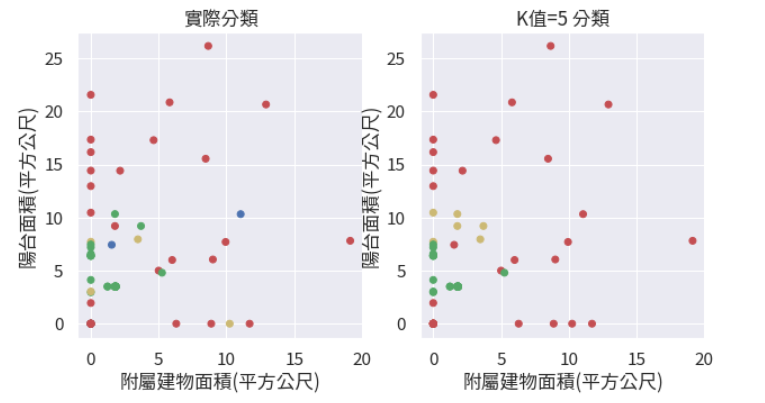

<font color = 'red'>**win**</font>
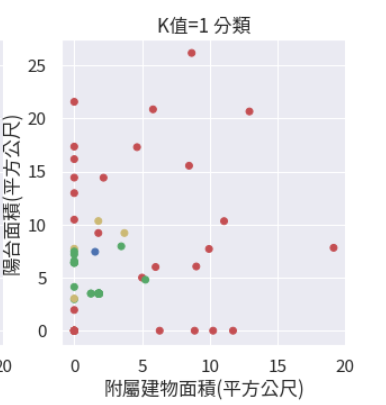
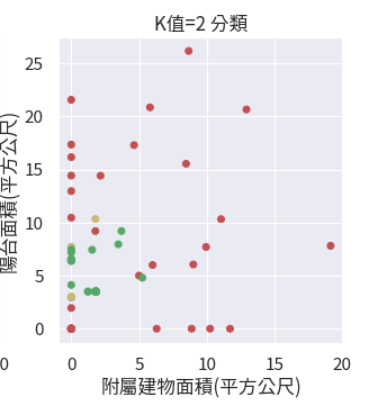

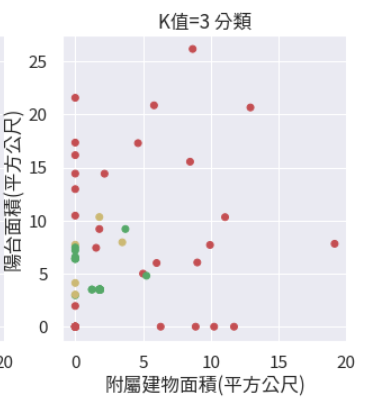

**K值 = 1更能準確分類**

#**6.疑問的回答**

**問題1:**可以用 **移轉層次、屋齡、建物現況格局-房、建物現況格局-衛、有無隔間、附屬建物面積(平方公尺)、陽台面積(平方公尺)** 這些欄位預測**單價(平方公尺/元)**嗎?

**回答1:** <font color ='red'>**不可以**</font>，準確度 **MSE:** 6488224765.28
、**R2:** -0.01

**改善方法:**重新選擇其他變數建構模型

**問題2:**可以用 建**物現況格局-房、建物現況格局-衛、附屬建物面積(平方公尺)、陽台面積(平方公尺)、有無隔間、有無電梯、有無管理組織** 這些欄位分類**建物型態**嗎?

**回答2:**<font color ='red'>**可以**</font>, 準確度 **訓練集**: 0.912
**測試集**: 0.855 (大於0.8算很不錯)

**強化方向:** 找到準確度更高的K值

## 撰寫注意事項/評分重點：

1. 以Python語言撰寫，且所有程式碼必須註解其目的與功能。
2. 以 .ipynb 、 .html 兩種格式(二個不同格式檔案、相同內容)繳交最後報告；.html 格式檔案內容必須全部成功執行、且看得到執行結果。
3. 避免冗長、無意義的執行輸出結果。
4. 專題成果必須是逐步累積的，可以看得到每一星期的新增成果與改變。
5. 使用本template與章節。
6. 使用本課程教授重點。
7. 必須使用至少二種演算法。


In [ ]:
#%%shell
#jupyter nbconvert --to html '剛複製的路徑'

%%shell
jupyter nbconvert --to html '/content/drive/MyDrive/Colab Notebooks/專題二_課後補強__S08521136_2023 01 13.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/專題二_課後補強__S08521136_2023 01 13.ipynb to html
[NbConvertApp] Writing 3380744 bytes to /content/drive/MyDrive/Colab Notebooks/專題二_課後補強__S08521136_2023 01 13.html
